In [9]:
import sys
import os

# Automatic search for project processing
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [10]:
from src.data_preprocess.load import file_to_pd

df = file_to_pd('../Data/output.csv')

In [11]:
from src.data_preprocess.preprocess import data_preprocess

train_loader, test_loader, scaler_X, scaler_y = data_preprocess(df, model_name='mlp')

X_train, X_test, y_train, y_test = data_preprocess(df, model_name='ML')

In [12]:
from src.models.mlp import load_model
from joblib import load
model_rf = load('../models/ML_weights.pth')
model_xgb = load('../models/ML_weights_xgb.pth')

from src.models.model_factory import get_model

model_mlp = load_model('../models/mlp_weights.pth')

In [13]:
from src.evaluation.evaluate import evaluate_model
y_pred = model_xgb.predict(X_test)
rf_metrics = evaluate_model(y_pred=y_pred,y_true=y_test)

In [14]:
from src.evaluation.evaluate import evaluate_model
y_pred = model_rf.predict(X_test)
xgb_metrics = evaluate_model(y_pred=y_pred,y_true=y_test)

In [15]:
from src.evaluation.evaluate import evaluate_model
import torch
X_test_all, y_test_all = [], []

for X_batch, y_batch in test_loader:
    X_test_all.append(X_batch)
    y_test_all.append(y_batch)
    
X_test_np = torch.cat(X_test_all).numpy()
y_test_np = torch.cat(y_test_all).numpy()


y_pred = model_mlp.predict(X_test_np)
y_test_original = scaler_y.inverse_transform(y_test_np)
y_pred_original = scaler_y.inverse_transform(y_pred)
mlp_metrics = evaluate_model(y_true=y_test_original, y_pred=y_pred_original)


📋 Metrics after cross validation:
               MSE      RMSE       MAE  MAPE (%)        R²  Accuracy < 0.005
Random Forest  0.0  0.000596  0.000368  0.237057  0.941918             81.00
XGBoost        0.0  0.000482  0.000258  0.242472  0.961911             79.75
MLP            0.0  0.000170  0.000097  0.009410  0.995286            100.00

📄 Metrics saved in: results/cv_metrics_th=0.005.csv


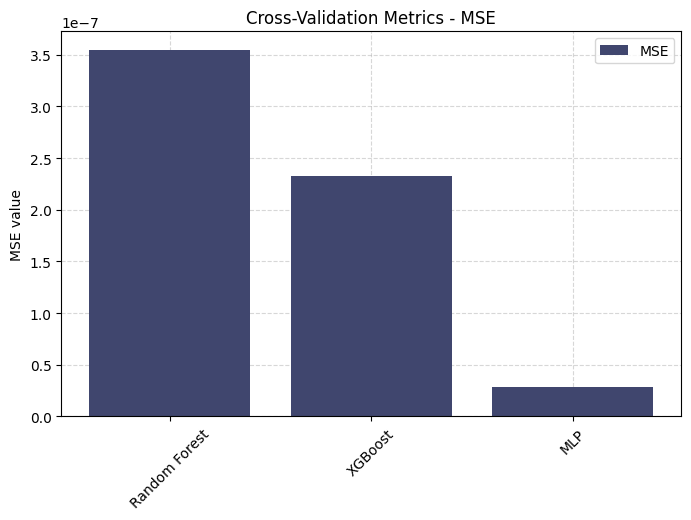

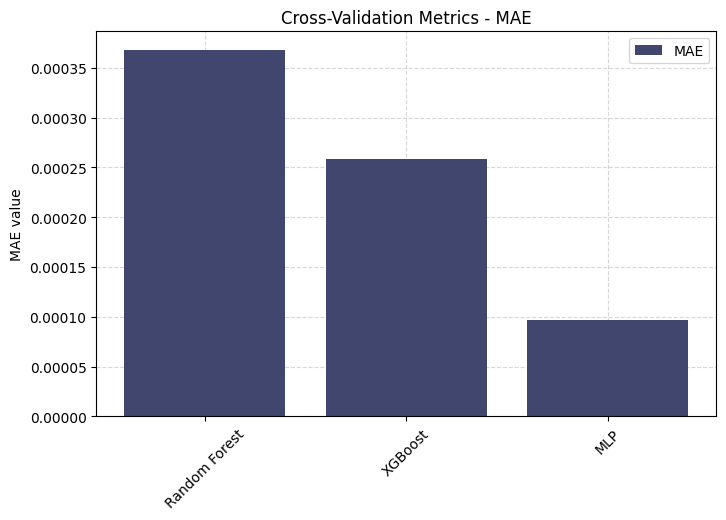

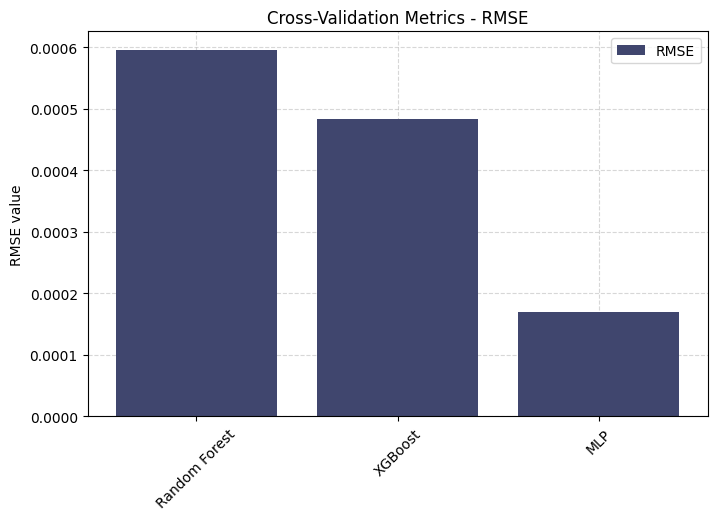

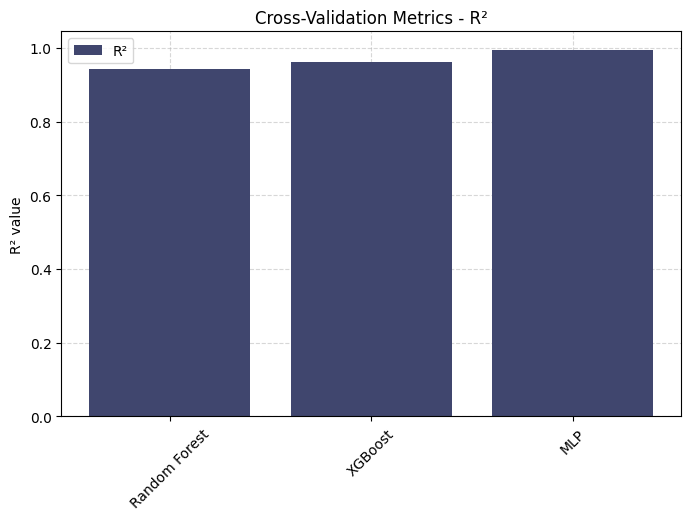

In [16]:
from src.visualization.visualization import compare_cv_results

compare_cv_results(
    results={
        "Random Forest": rf_metrics,
        "XGBoost": xgb_metrics,
        "MLP": mlp_metrics
    },
    title="Cross-Validation Metrics",
    save_path_csv="results/cv_metrics_th=0.005.csv"
)